___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, log_loss, recall_score,accuracy_score,precision_score,f1_score
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.cluster import KElbowVisualizer
from xgboost import XGBClassifier  # önce hata verdi, sonra alttaki satırı çalıştırıp ayrıca install ettim. 

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")


In [ ]:
# from sklearnex import patch_sklearn
# patch_sklearn()

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [ ]:
df_male = pd.read_csv('https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr', encoding="Latin-1")

In [ ]:
df_female = pd.read_csv('https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq')

## Explore Data (EDA)

- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

In [ ]:
df_male.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,...,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,...,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,...,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,...,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,...,Combat Service Support,92G,North Carolina,2,NaN,2,21,77,213,Right hand


In [ ]:
df_male.columns

Index(['subjectid', 'abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed',
       ...
       'Branch', 'PrimaryMOS', 'SubjectsBirthLocation', 'SubjectNumericRace',
       'Ethnicity', 'DODRace', 'Age', 'Heightin', 'Weightlbs',
       'WritingPreference'],
      dtype='object', length=108)

In [ ]:
df_female.head()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,...,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,...,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,...,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,...,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,...,Combat Arms,42A,Texas,1,NaN,1,45,63,195,Right hand


In [ ]:
df_female.columns

Index(['SubjectId', 'abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed',
       ...
       'Branch', 'PrimaryMOS', 'SubjectsBirthLocation', 'SubjectNumericRace',
       'Ethnicity', 'DODRace', 'Age', 'Heightin', 'Weightlbs',
       'WritingPreference'],
      dtype='object', length=108)

In [ ]:
df_female.rename(columns={"SubjectId": "subjectid"}, inplace=True)


In [ ]:
print(df_male.shape)
print(df_female.shape)

(4082, 108)
(1986, 108)


In [ ]:
df = pd.concat([df_male,df_female], axis=0, ignore_index=True)
df.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,...,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,...,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,...,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,...,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,...,Combat Service Support,92G,North Carolina,2,NaN,2,21,77,213,Right hand


In [ ]:
df.columns

Index(['subjectid', 'abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed',
       ...
       'Branch', 'PrimaryMOS', 'SubjectsBirthLocation', 'SubjectNumericRace',
       'Ethnicity', 'DODRace', 'Age', 'Heightin', 'Weightlbs',
       'WritingPreference'],
      dtype='object', length=108)

In [ ]:
df.shape

(6068, 108)

In [ ]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Data columns (total 108 columns):
 #    Column                          Dtype 
---   ------                          ----- 
 0    subjectid                       int64 
 1    abdominalextensiondepthsitting  int64 
 2    acromialheight                  int64 
 3    acromionradialelength           int64 
 4    anklecircumference              int64 
 5    axillaheight                    int64 
 6    balloffootcircumference         int64 
 7    balloffootlength                int64 
 8    biacromialbreadth               int64 
 9    bicepscircumferenceflexed       int64 
 10   bicristalbreadth                int64 
 11   bideltoidbreadth                int64 
 12   bimalleolarbreadth              int64 
 13   bitragionchinarc                int64 
 14   bitragionsubmandibulararc       int64 
 15   bizygomaticbreadth              int64 
 16   buttockcircumference            int64 
 17   buttockdepth                   

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.select_dtypes("O")

,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,Ethnicity,WritingPreference
0,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,NaN,Right hand
1,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,NaN,Left hand
2,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,NaN,Left hand
3,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,NaN,Right hand
4,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,92G,North Carolina,NaN,Right hand
...,...,...,...,...,...,...,...,...,...
6063,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,42A,Texas,Mexican,Right hand
6064,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,25U,Texas,Mexican,Right hand
6065,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,42A,Texas,NaN,Right hand
6066,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,92Y,Texas,Mexican,Right hand


In [ ]:
df.isnull().sum().sort_values(ascending=False)

Ethnicity                         4647
subjectid                            0
radialestylionlength                 0
thighcircumference                   0
tenthribheight                       0
                                  ... 
earprotrusion                        0
earlength                            0
earbreadth                           0
crotchlengthposterioromphalion       0
WritingPreference                    0
Length: 108, dtype: int64

In [ ]:
[col for col in df.columns if df[col].isnull().any()]

['Ethnicity']

In [ ]:
df['Ethnicity'].isnull().sum()

4647

In [ ]:
df.drop('Ethnicity', axis=1, inplace=True)

In [ ]:
df.describe(include=['O'])

,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,WritingPreference
count,6068,6068,6068,6068,6068,6068,6068,6068
unique,2,253,12,3,3,285,152,3
top,Male,27-Feb-12,Camp Shelby,Regular Army,Combat Service Support,11B,California,Right hand
freq,4082,45,1160,3140,3174,671,446,5350


In [ ]:
print(df["DODRace"].value_counts())

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: DODRace, dtype: int64


In [ ]:
df.DODRace.unique()

array([1, 2, 3, 4, 5, 6, 8])

In [ ]:
df["DODRace"] = df.DODRace.map({
                                    1: "White",
                                    2: "Black",
                                    3: "Hispanic",
                                    4: "Asian",
                                    5: "Native American",
                                    6: "Pacific Islander",
                                    8: "Other"
                                  })

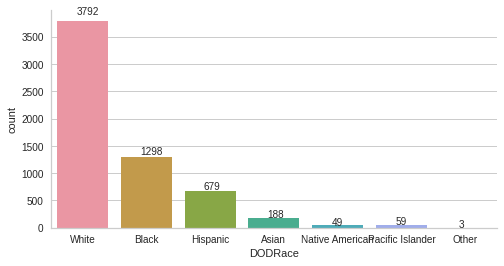

In [ ]:
plt.figure(figsize=(8,4))
ax = sns.countplot(df['DODRace'])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.3, p.get_height() * 1.03));

In [ ]:
df.groupby(["Weightlbs"])["DODRace"].value_counts()

Weightlbs  DODRace 
0          Hispanic    1
86         White       1
88         White       1
90         Black       1
95         Black       1
                      ..
295        White       1
300        White       3
310        White       2
315        Hispanic    1
321        White       1
Name: DODRace, Length: 620, dtype: int64

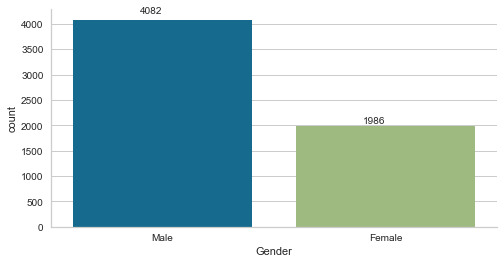

In [ ]:
plt.figure(figsize=(8,4))
ax = sns.countplot(df['Gender'])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.3, p.get_height() * 1.03));

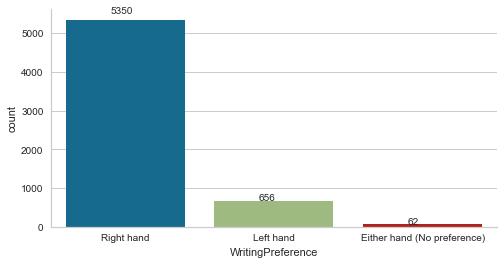

In [ ]:
plt.figure(figsize=(8,4))
ax = sns.countplot(df['WritingPreference'])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.3, p.get_height() * 1.03));

In [ ]:
df.groupby(['WritingPreference'])["DODRace"].value_counts()  # There seems no relationship between 'WritingPreference' and "DODRace". So it might be dropped.

WritingPreference            DODRace         
Either hand (No preference)  White                 43
                             Black                 13
                             Hispanic               3
                             Asian                  2
                             Native American        1
Left hand                    White                422
                             Black                150
                             Hispanic              50
                             Asian                 22
                             Pacific Islander       7
                             Native American        5
Right hand                   White               3327
                             Black               1135
                             Hispanic             626
                             Asian                164
                             Pacific Islander      52
                             Native American       43
                             Other  

In [ ]:
df.SubjectsBirthLocation.value_counts().head(30)

California        446
New York          420
Texas             397
Indiana           266
Oklahoma          221
Illinois          216
Florida           210
Minnesota         200
Michigan          196
Mississippi       194
Georgia           170
Alabama           164
South Carolina    161
North Carolina    149
Ohio              142
Louisiana         137
Pennsylvania      132
Virginia          118
Massachusetts     112
Wisconsin         102
Germany            92
New Jersey         89
Puerto Rico        88
Arizona            84
Missouri           84
Colorado           81
Maryland           80
Tennessee          74
Kentucky           69
Washington         66
Name: SubjectsBirthLocation, dtype: int64

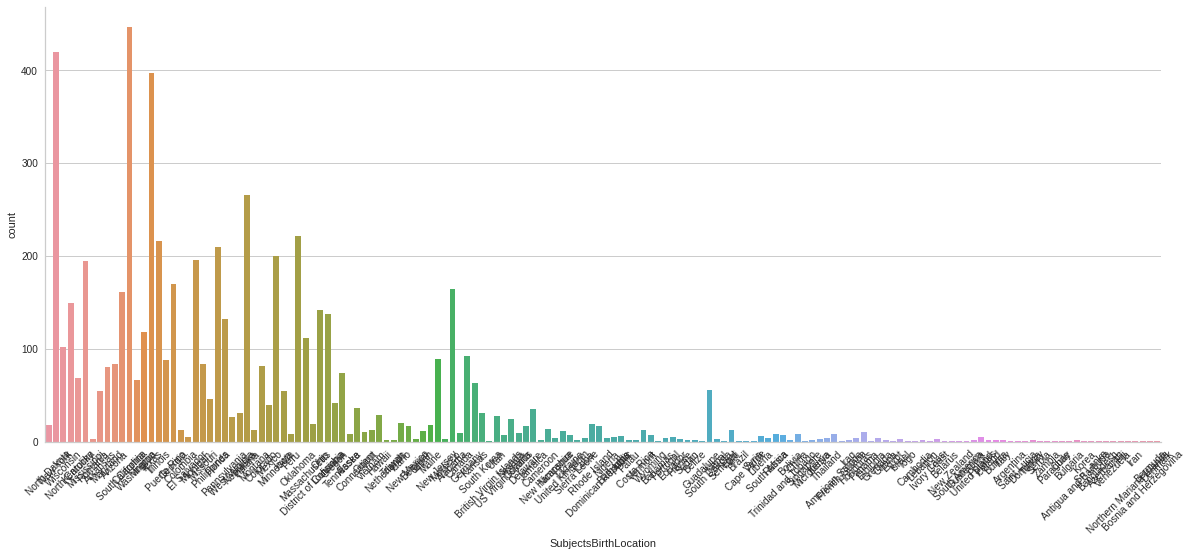

In [ ]:
plt.figure(figsize=(20,8))
ax = sns.countplot(df['SubjectsBirthLocation'])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# for p in ax.patches:
#     ax.annotate(str(p.get_height()), (p.get_x() + 0.3, p.get_height() * 1.03))
plt.xticks(rotation=45);

Text(0.5, 1.0, 'Hispanic')

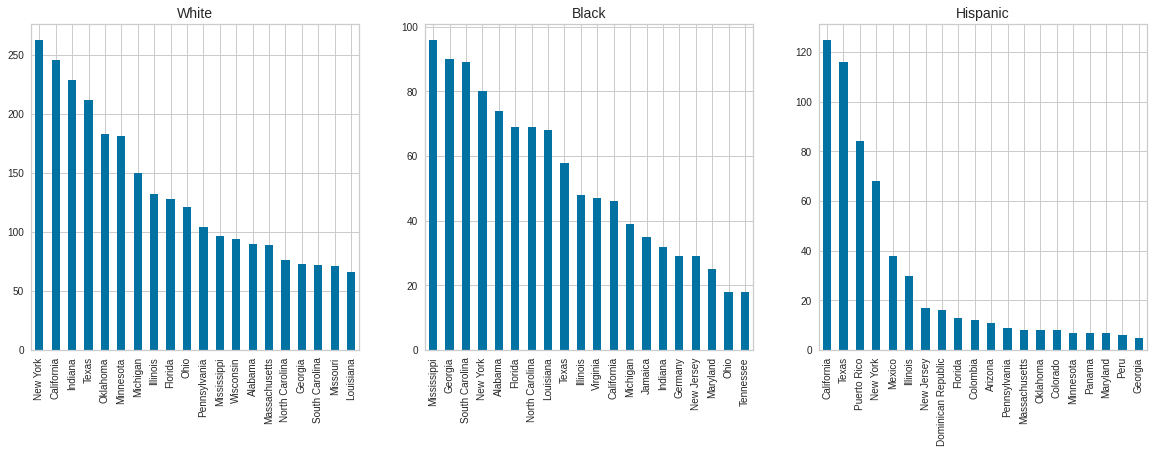

In [ ]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
df['SubjectsBirthLocation'][df.DODRace == "White"].value_counts().head(20).plot(kind= 'bar')
plt.title("White", size=14)
plt.subplot(1,3,2)
df['SubjectsBirthLocation'][df.DODRace == "Black"].value_counts().head(20).plot(kind= 'bar')
plt.title("Black", size=14)
plt.subplot(1,3,3)
df['SubjectsBirthLocation'][df.DODRace == "Hispanic"].value_counts().head(20).plot(kind= 'bar')
plt.title("Hispanic", size=14)

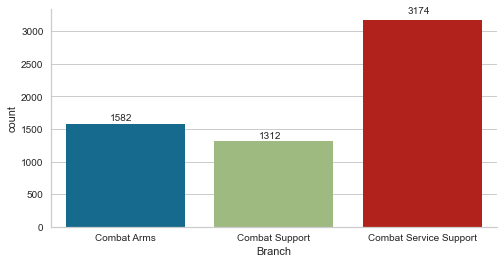

In [ ]:
plt.figure(figsize=(8,4))
ax = sns.countplot(df['Branch'])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.3, p.get_height() * 1.03));

In [ ]:
df.groupby(['Branch'])["DODRace"].value_counts()  ##The order of the races are different from the others in terms of combat arms. The number of the blacks is expected to be higher but not.

Branch                  DODRace         
Combat Arms             White               1146
                        Hispanic             189
                        Black                173
                        Asian                 44
                        Native American       16
                        Pacific Islander      13
                        Other                  1
Combat Service Support  White               1911
                        Black                745
                        Hispanic             365
                        Asian                 99
                        Pacific Islander      27
                        Native American       25
                        Other                  2
Combat Support          White                735
                        Black                380
                        Hispanic             125
                        Asian                 45
                        Pacific Islander      19
                        Nati

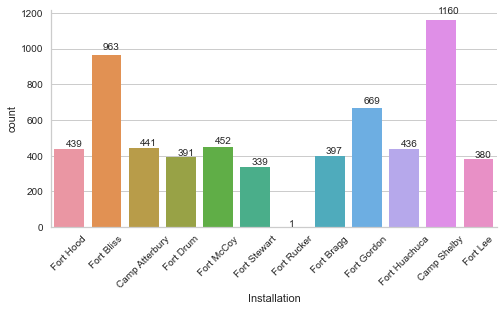

In [ ]:
plt.figure(figsize=(8,4))
ax = sns.countplot(df["Installation"])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.3, p.get_height() * 1.03))
    plt.xticks(rotation=45);

In [ ]:
df.groupby(["DODRace"])['Installation'].value_counts().tail(50)

DODRace           Installation  
Black             Camp Atterbury     77
                  Fort Drum          65
                  Fort Huachuca      51
                  Fort McCoy         27
Hispanic          Fort Bliss        124
                  Camp Shelby        97
                  Fort Gordon        77
                  Fort Bragg         66
                  Fort McCoy         61
                  Fort Drum          55
                  Fort Hood          54
                  Fort Stewart       47
                  Fort Lee           42
                  Fort Huachuca      39
                  Camp Atterbury     17
Native American   Camp Shelby        17
                  Fort Bliss          9
                  Fort Bragg          5
                  Fort Gordon         3
                  Fort Lee            3
                  Fort McCoy          3
                  Fort Drum           2
                  Fort Hood           2
                  Fort Huachuca       2
       

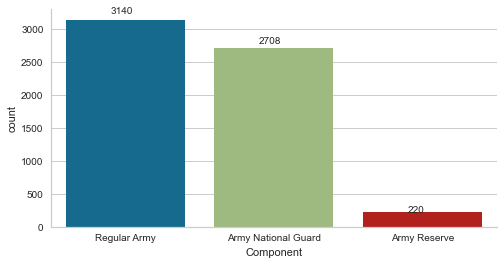

In [ ]:
plt.figure(figsize=(8,4))
ax = sns.countplot(df["Component"])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.3, p.get_height() * 1.03));

In [ ]:
df.groupby(["Component"])["DODRace"].value_counts()

Component            DODRace         
Army National Guard  White               1855
                     Black                499
                     Hispanic             253
                     Asian                 60
                     Native American       24
                     Pacific Islander      17
Army Reserve         White                114
                     Black                 52
                     Hispanic              41
                     Asian                  9
                     Pacific Islander       3
                     Native American        1
Regular Army         White               1823
                     Black                747
                     Hispanic             385
                     Asian                119
                     Pacific Islander      39
                     Native American       24
                     Other                  3
Name: DODRace, dtype: int64

In [ ]:
df.groupby(["Component", "Branch"])["DODRace"].value_counts()

Component            Branch                  DODRace         
Army National Guard  Combat Arms             White               623
                                             Black                79
                                             Hispanic             74
                                             Asian                18
                                             Native American       9
                                             Pacific Islander      4
                     Combat Service Support  White               917
                                             Black               312
                                             Hispanic            142
                                             Asian                33
                                             Pacific Islander     11
                                             Native American      10
                     Combat Support          White               315
                                         

In [ ]:
drop_list1 = [
    "Date", "Installation", "Component",  "PrimaryMOS",
    "Weightlbs", "Heightin", 'WritingPreference',   
]

In [ ]:
df.drop(drop_list1, axis=1, inplace=True)

In [ ]:
df.SubjectNumericRace.value_counts()

1        3561
2        1026
3         541
31        160
51        126
8         116
4         109
21         60
6          59
41         46
61         35
23         34
28         26
251        20
5          18
18         18
25         14
351        10
38          9
64          8
62          8
35          8
42          7
63          7
231         6
43          5
235         4
218         3
651         2
2351        2
318         2
641         2
451         2
423         2
431         2
2518        2
48          1
631         1
4251        1
428         1
238         1
358         1
425         1
42351       1
Name: SubjectNumericRace, dtype: int64

In [ ]:
df.SubjectNumericRace.unique()

array([    1,     2,   351,     3,    61,     4,    28,     5,    21,
          41,    31,   641,    23,     8,   251,    38,     6,    51,
          18,    64,   318,    63,    25,    43,   423,    35,   425,
         235,   358,    62,    42,   451,   238,  4251,   431,  2518,
         218,   231,   428,   651,   631,    48,  2351, 42351])

In [ ]:
df.groupby(["DODRace"])['SubjectNumericRace'].value_counts().head(50)  ## It has the same values with target feature. So it can be dropped.

DODRace   SubjectNumericRace
Asian     4                      108
          41                      26
          6                       21
          8                       10
          61                       8
          64                       6
          43                       2
          18                       1
          42                       1
          48                       1
          62                       1
          63                       1
          451                      1
          641                      1
Black     2                     1025
          8                       94
          21                      51
          23                      26
          28                      25
          251                     18
          25                      13
          3                        6
          42                       6
          62                       6
          38                       4
          18                       3
         

In [ ]:
df.drop("SubjectNumericRace",axis=1,inplace=True)

In [ ]:
df.DODRace.value_counts()

White               3792
Black               1298
Hispanic             679
Asian                188
Pacific Islander      59
Native American       49
Other                  3
Name: DODRace, dtype: int64

In [ ]:
df = df[(df["DODRace"] == "White") | (df["DODRace"] == "Black") |
                (df["DODRace"] == "Hispanic")]
# 500 den aşağısını atacaktık

In [ ]:
df

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Branch,SubjectsBirthLocation,DODRace,Age
0,10027,266,1467,337,222,1347,253,202,401,369,...,440,1054,815,175,853,Male,Combat Arms,North Dakota,White,41
1,10032,233,1395,326,220,1293,245,193,394,338,...,371,1054,726,167,815,Male,Combat Support,New York,White,35
2,10033,287,1430,341,230,1327,256,196,427,408,...,411,1041,929,180,831,Male,Combat Support,New York,Black,42
3,10092,234,1347,310,230,1239,262,199,401,359,...,399,968,794,176,793,Male,Combat Service Support,Wisconsin,White,31
4,10093,250,1585,372,247,1478,267,224,435,356,...,379,1245,946,188,954,Male,Combat Service Support,North Carolina,Black,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6063,29501,285,1392,335,223,1297,252,196,368,299,...,370,1002,832,162,836,Female,Combat Support,Texas,Hispanic,51
6064,29502,262,1324,301,202,1204,236,181,378,294,...,374,958,717,157,804,Female,Combat Support,Texas,Hispanic,40
6065,29503,260,1334,318,213,1259,234,183,363,332,...,351,970,762,159,774,Female,Combat Support,Texas,Black,40
6066,29511,205,1293,302,199,1207,213,163,376,276,...,335,952,632,146,769,Female,Combat Support,Texas,Hispanic,31


In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Branch,SubjectsBirthLocation,DODRace,Age
0,10027,266,1467,337,222,1347,253,202,401,369,...,440,1054,815,175,853,Male,Combat Arms,North Dakota,White,41
1,10032,233,1395,326,220,1293,245,193,394,338,...,371,1054,726,167,815,Male,Combat Support,New York,White,35
2,10033,287,1430,341,230,1327,256,196,427,408,...,411,1041,929,180,831,Male,Combat Support,New York,Black,42
3,10092,234,1347,310,230,1239,262,199,401,359,...,399,968,794,176,793,Male,Combat Service Support,Wisconsin,White,31
4,10093,250,1585,372,247,1478,267,224,435,356,...,379,1245,946,188,954,Male,Combat Service Support,North Carolina,Black,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5764,29501,285,1392,335,223,1297,252,196,368,299,...,370,1002,832,162,836,Female,Combat Support,Texas,Hispanic,51
5765,29502,262,1324,301,202,1204,236,181,378,294,...,374,958,717,157,804,Female,Combat Support,Texas,Hispanic,40
5766,29503,260,1334,318,213,1259,234,183,363,332,...,351,970,762,159,774,Female,Combat Support,Texas,Black,40
5767,29511,205,1293,302,199,1207,213,163,376,276,...,335,952,632,146,769,Female,Combat Support,Texas,Hispanic,31


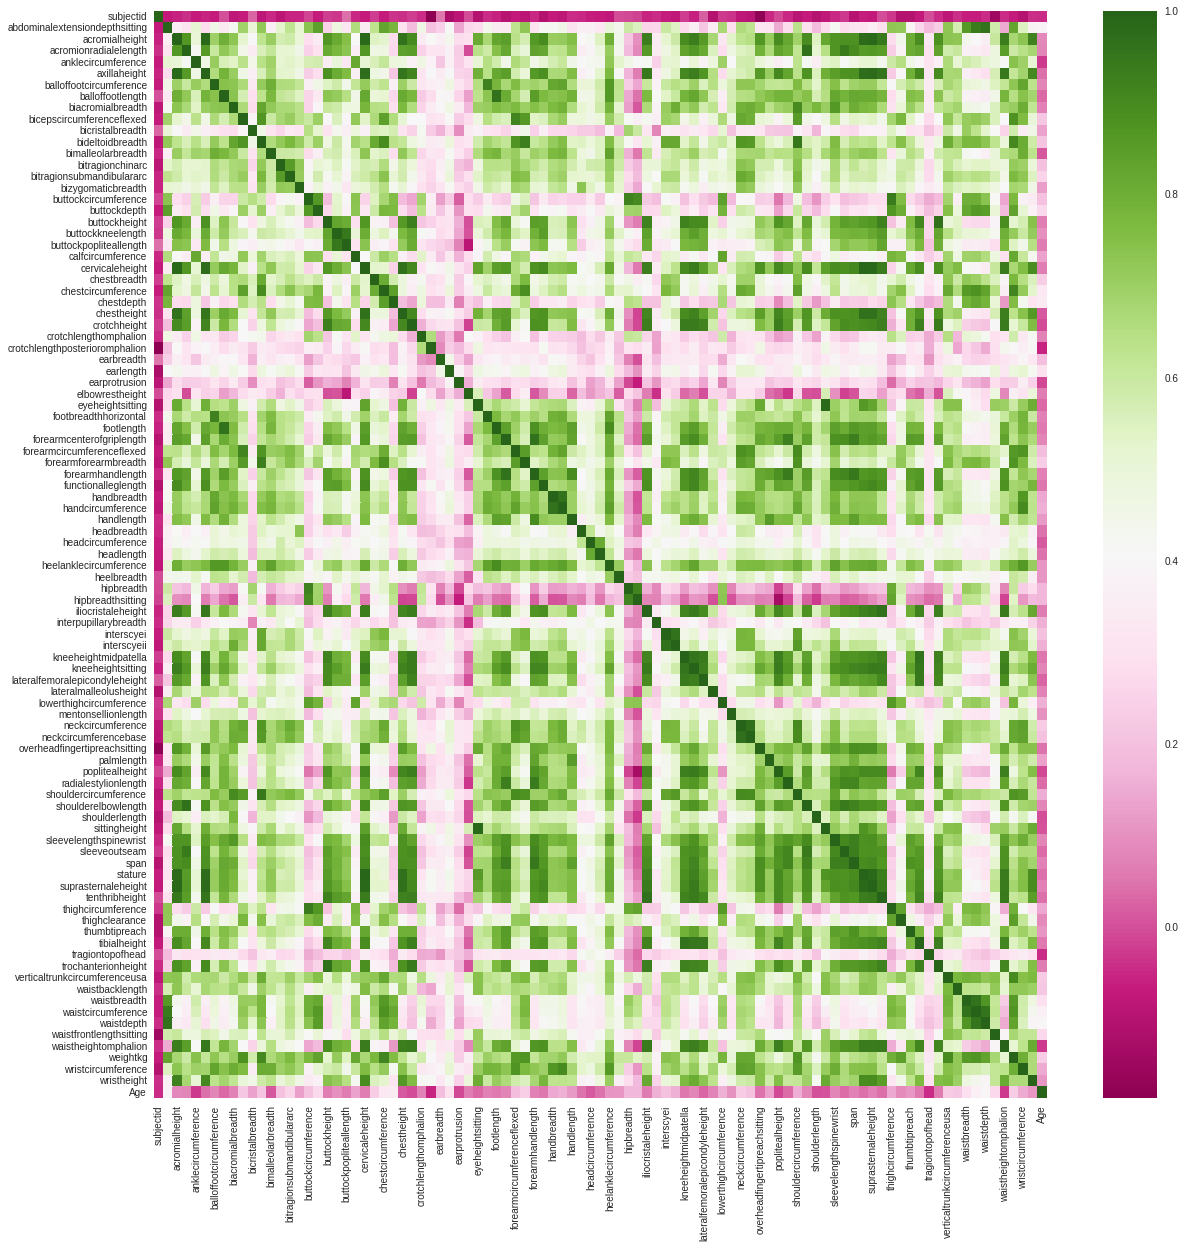

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), cmap ="PiYG")

In [ ]:
df_temp = df.corr()

feature =[]
collinear=[]
for col in df_temp.columns:
    for i in df_temp.index:
        if (df_temp[col][i]> .9 and df_temp[col][i] < 1) or (df_temp[col][i]< -.9 and df_temp[col][i] > -1) :
                feature.append(col)
                collinear.append(i)

In [ ]:
my_dict = {"feature":feature, "collinear":collinear}
df_col = pd.DataFrame(my_dict)
df_col

,feature,collinear
0,abdominalextensiondepthsitting,waistcircumference
1,abdominalextensiondepthsitting,waistdepth
2,acromialheight,axillaheight
3,acromialheight,cervicaleheight
4,acromialheight,chestheight
...,...,...
281,weightkg,chestcircumference
282,weightkg,verticaltrunkcircumferenceusa
283,wristcircumference,handcircumference
284,wristheight,acromialheight


In [ ]:
df_col.value_counts("feature")

feature
kneeheightsitting                 19
iliocristaleheight                15
tenthribheight                    15
axillaheight                      14
waistheightomphalion              14
crotchheight                      14
cervicaleheight                   14
kneeheightmidpatella              12
suprasternaleheight               12
chestheight                       11
tibialheight                      11
acromialheight                    10
poplitealheight                   10
span                               9
trochanterionheight                9
stature                            9
lateralfemoralepicondyleheight     7
buttockheight                      7
sleeveoutseam                      6
forearmhandlength                  5
radialestylionlength               4
shoulderelbowlength                3
functionalleglength                3
waistcircumference                 3
bideltoidbreadth                   3
weightkg                           3
forearmcenterofgriplength     

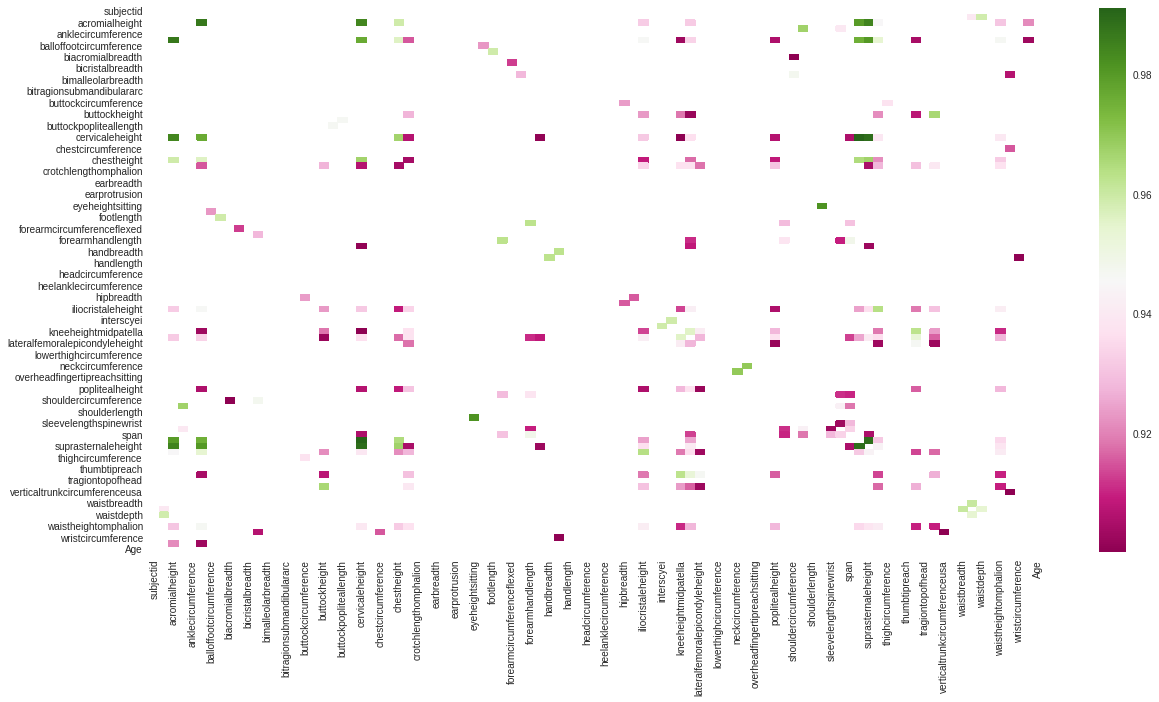

In [ ]:
df_temp = df.corr()
filteredDf = df_temp[((df_temp >= .9) | (df_temp <= -.9)) & (df_temp !=1.000)]
plt.figure(figsize=(20,10))
sns.heatmap(filteredDf,cmap="PiYG")  #, annot=True
plt.show()

In [ ]:
df.corr().abs().unstack().sort_values(ascending=False).drop_duplicates().head(20)

subjectid            subjectid                    1.000000
stature              cervicaleheight              0.991053
suprasternaleheight  stature                      0.989120
                     cervicaleheight              0.989112
axillaheight         acromialheight               0.987115
suprasternaleheight  acromialheight               0.984711
acromialheight       cervicaleheight              0.983955
sittingheight        eyeheightsitting             0.981732
suprasternaleheight  axillaheight                 0.980594
acromialheight       stature                      0.979925
axillaheight         cervicaleheight              0.976609
                     stature                      0.975436
neckcircumference    neckcircumferencebase        0.969495
shoulderelbowlength  acromionradialelength        0.967500
suprasternaleheight  chestheight                  0.967309
cervicaleheight      chestheight                  0.967151
buttockheight        trochanterionheight          0.9659

Handling Outliers

In [ ]:
def outlier_function(df, col_name,k):
    ''' this function detects first and third quartile and interquartile range for a given column of a dataframe
    then calculates upper and lower limits to determine outliers conservatively
    returns the number of lower and uper limit and number of outliers respectively
    '''
    first_quartile = np.percentile(np.array(df[col_name].tolist()), 25)
    third_quartile = np.percentile(np.array(df[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile
                      
    upper_limit = third_quartile+(k*IQR)
    lower_limit = first_quartile-(k*IQR)
    outlier_count = 0
                      
    for value in df[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count +=1
    return lower_limit, upper_limit, outlier_count

In [ ]:
# loop through all columns to see if there are any outliers
## while k = 1.5 number of the outliers is 2637.  Because this number is nearly the half of the data, taking a higher IQR would be better.
k=1.5
print("\tNumber of Outliers for {}*IQR\n".format(k))
total=0
for col in df.select_dtypes("number"):
    if outlier_function(df.select_dtypes("number"), col,k)[2] > 0:
        outliers=outlier_function(df.select_dtypes("number"), col, k)[2]
        total+=outliers
        print("{} outliers in '{}'".format(outliers,col))
print("\n\t{} OUTLIERS TOTALLY".format(total))

	Number of Outliers for 1.5*IQR

1 outliers in 'subjectid'
46 outliers in 'abdominalextensiondepthsitting'
14 outliers in 'acromialheight'
31 outliers in 'acromionradialelength'
73 outliers in 'anklecircumference'
27 outliers in 'axillaheight'
23 outliers in 'balloffootcircumference'
11 outliers in 'balloffootlength'
1 outliers in 'biacromialbreadth'
19 outliers in 'bicepscircumferenceflexed'
57 outliers in 'bicristalbreadth'
12 outliers in 'bideltoidbreadth'
6 outliers in 'bimalleolarbreadth'
46 outliers in 'bitragionchinarc'
16 outliers in 'bitragionsubmandibulararc'
6 outliers in 'bizygomaticbreadth'
58 outliers in 'buttockcircumference'
47 outliers in 'buttockdepth'
42 outliers in 'buttockheight'
27 outliers in 'buttockkneelength'
25 outliers in 'buttockpopliteallength'
53 outliers in 'calfcircumference'
10 outliers in 'cervicaleheight'
29 outliers in 'chestbreadth'
15 outliers in 'chestcircumference'
29 outliers in 'chestdepth'
11 outliers in 'chestheight'
19 outliers in 'crotchhe

In [ ]:
k=3
for i in df.select_dtypes("number"):
    lower,upper,outliers=outlier_function(df.select_dtypes("number"),i,k)
    df=df[(df.select_dtypes("number")[i]>lower)&(df.select_dtypes("number")[i]<upper)]

In [ ]:
df.shape

(5763, 99)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5763 entries, 0 to 5767
Data columns (total 99 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   subjectid                       5763 non-null   int64 
 1   abdominalextensiondepthsitting  5763 non-null   int64 
 2   acromialheight                  5763 non-null   int64 
 3   acromionradialelength           5763 non-null   int64 
 4   anklecircumference              5763 non-null   int64 
 5   axillaheight                    5763 non-null   int64 
 6   balloffootcircumference         5763 non-null   int64 
 7   balloffootlength                5763 non-null   int64 
 8   biacromialbreadth               5763 non-null   int64 
 9   bicepscircumferenceflexed       5763 non-null   int64 
 10  bicristalbreadth                5763 non-null   int64 
 11  bideltoidbreadth                5763 non-null   int64 
 12  bimalleolarbreadth              5763 non-null   

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Branch,SubjectsBirthLocation,DODRace,Age
0,10027,266,1467,337,222,1347,253,202,401,369,...,440,1054,815,175,853,Male,Combat Arms,North Dakota,White,41
1,10032,233,1395,326,220,1293,245,193,394,338,...,371,1054,726,167,815,Male,Combat Support,New York,White,35
2,10033,287,1430,341,230,1327,256,196,427,408,...,411,1041,929,180,831,Male,Combat Support,New York,Black,42
3,10092,234,1347,310,230,1239,262,199,401,359,...,399,968,794,176,793,Male,Combat Service Support,Wisconsin,White,31
4,10093,250,1585,372,247,1478,267,224,435,356,...,379,1245,946,188,954,Male,Combat Service Support,North Carolina,Black,21


In [ ]:
df.drop('subjectid', axis=1, inplace=True)

In [ ]:
df.head()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,...,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Branch,SubjectsBirthLocation,DODRace,Age
0,266,1467,337,222,1347,253,202,401,369,274,...,440,1054,815,175,853,Male,Combat Arms,North Dakota,White,41
1,233,1395,326,220,1293,245,193,394,338,257,...,371,1054,726,167,815,Male,Combat Support,New York,White,35
2,287,1430,341,230,1327,256,196,427,408,261,...,411,1041,929,180,831,Male,Combat Support,New York,Black,42
3,234,1347,310,230,1239,262,199,401,359,262,...,399,968,794,176,793,Male,Combat Service Support,Wisconsin,White,31
4,250,1585,372,247,1478,267,224,435,356,263,...,379,1245,946,188,954,Male,Combat Service Support,North Carolina,Black,21


In [ ]:
pd.get_dummies(df.drop(columns=['DODRace']))

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,...,SubjectsBirthLocation_United States,SubjectsBirthLocation_Utah,SubjectsBirthLocation_Venezuela,SubjectsBirthLocation_Vermont,SubjectsBirthLocation_Virginia,SubjectsBirthLocation_Washington,SubjectsBirthLocation_West Virginia,SubjectsBirthLocation_Wisconsin,SubjectsBirthLocation_Wyoming,SubjectsBirthLocation_Zambia
0,266,1467,337,222,1347,253,202,401,369,274,...,0,0,0,0,0,0,0,0,0,0
1,233,1395,326,220,1293,245,193,394,338,257,...,0,0,0,0,0,0,0,0,0,0
2,287,1430,341,230,1327,256,196,427,408,261,...,0,0,0,0,0,0,0,0,0,0
3,234,1347,310,230,1239,262,199,401,359,262,...,0,0,0,0,0,0,0,1,0,0
4,250,1585,372,247,1478,267,224,435,356,263,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5758,238,1414,336,207,1304,218,183,385,305,298,...,0,0,0,0,0,0,0,0,0,0
5759,285,1392,335,223,1297,252,196,368,299,312,...,0,0,0,0,0,0,0,0,0,0
5760,262,1324,301,202,1204,236,181,378,294,287,...,0,0,0,0,0,0,0,0,0,0
5761,260,1334,318,213,1259,234,183,363,332,299,...,0,0,0,0,0,0,0,0,0,0


# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X=pd.get_dummies(df.drop(columns=['DODRace']))
y = df['DODRace']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)


Train features shape :  (4610, 235)
Train target shape   :  (4610,)
Test features shape  :  (1153, 235)
Test target shape    :  (1153,)


# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

### Vanilla Logistic Model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.pipeline import Pipeline
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101))]
pipe_log_model = Pipeline(steps=operations)


In [ ]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [ ]:
pipe_log_model.fit(X_train,y_train)
eval_metric(pipe_log_model, X_train, y_train, X_test, y_test)

Test_Set
[[248  11   9]
 [  3 109  17]
 [ 21  77 658]]
              precision    recall  f1-score   support

       Black       0.91      0.93      0.92       268
    Hispanic       0.55      0.84      0.67       129
       White       0.96      0.87      0.91       756

    accuracy                           0.88      1153
   macro avg       0.81      0.88      0.83      1153
weighted avg       0.90      0.88      0.89      1153


Train_Set
[[ 960   40   27]
 [  21  460   68]
 [  65  364 2605]]
              precision    recall  f1-score   support

       Black       0.92      0.93      0.93      1027
    Hispanic       0.53      0.84      0.65       549
       White       0.96      0.86      0.91      3034

    accuracy                           0.87      4610
   macro avg       0.81      0.88      0.83      4610
weighted avg       0.90      0.87      0.88      4610



In [ ]:
scoring = {"f1_Hispanic" : make_scorer(f1_score, average = None, labels =["Hispanic"]),
           "precision_Hispanic" : make_scorer(precision_score, average = None, labels =["Hispanic"]),
           "recall_Hispanic" : make_scorer(recall_score, average = None, labels =["Hispanic"])}

In [ ]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101))]
model = Pipeline(steps=operations)

In [ ]:
scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic           0.596982
test_precision_Hispanic    0.487516
test_recall_Hispanic       0.772357
dtype: float64

### Logistic Model GridsearchCV

In [ ]:
recall_Hispanic =  make_scorer(recall_score, average=None, labels=["Hispanic"])

In [ ]:
param_grid = {
    "log__C": [0.3, 0.5, 0.6],
    'log__penalty': ["l1", "l2"],
    'log__solver': ['liblinear', 'lbfgs'],
}

In [ ]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101))]
model = Pipeline(steps=operations)

log_model_grid = GridSearchCV(model,
                              param_grid,
                              verbose=3,
                              scoring=recall_Hispanic,
                              n_jobs=-1, cv=5)

In [ ]:
log_model_grid.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('log',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=10000,
                                                           random_state=101))]),
             n_jobs=-1,
             param_grid={'log__C': [0.3, 0.5, 0.6],
                         'log__penalty': ['l1', 'l2'],
                         'log__solver': ['liblinear', 'lbfgs']},
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=3)

In [ ]:
log_model_grid.best_params_

{'log__C': 0.5, 'log__penalty': 'l2', 'log__solver': 'lbfgs'}

In [ ]:
log_model_grid.best_score_

0.774278565471226

In [ ]:
eval_metric(log_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[246  11  11]
 [  4 109  16]
 [ 20  83 653]]
              precision    recall  f1-score   support

       Black       0.91      0.92      0.91       268
    Hispanic       0.54      0.84      0.66       129
       White       0.96      0.86      0.91       756

    accuracy                           0.87      1153
   macro avg       0.80      0.88      0.83      1153
weighted avg       0.90      0.87      0.88      1153


Train_Set
[[ 956   41   30]
 [  23  454   72]
 [  63  382 2589]]
              precision    recall  f1-score   support

       Black       0.92      0.93      0.92      1027
    Hispanic       0.52      0.83      0.64       549
       White       0.96      0.85      0.90      3034

    accuracy                           0.87      4610
   macro avg       0.80      0.87      0.82      4610
weighted avg       0.90      0.87      0.88      4610



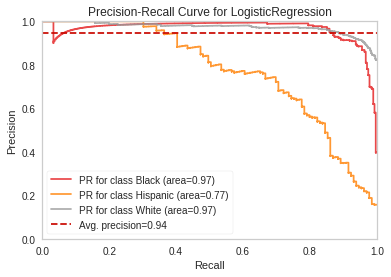

In [ ]:
from yellowbrick.classifier import PrecisionRecallCurve

operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101))]
model = Pipeline(steps=operations)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [ ]:
viz.score_    #["Hispanic"]

{'Black': 0.9658646021361101,
 'Hispanic': 0.7728895657940593,
 'White': 0.9731641289749186,
 'micro': 0.9447961897483869}

In [ ]:
y_pred = log_model_grid.predict(X_test)

log_AP = viz.score_["Hispanic"]
log_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
log_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 2. SVC

### Vanilla SVC model 

In [ ]:
operations_svc = [("scaler", StandardScaler()), ("svc", SVC(class_weight="balanced",random_state=101))]
pipe_svc_model = Pipeline(steps=operations_svc)

In [ ]:
pipe_svc_model.fit(X_train, y_train)

eval_metric(pipe_svc_model, X_train, y_train, X_test, y_test)

Test_Set
[[241  11  16]
 [  6 103  20]
 [ 18  78 660]]
              precision    recall  f1-score   support

       Black       0.91      0.90      0.90       268
    Hispanic       0.54      0.80      0.64       129
       White       0.95      0.87      0.91       756

    accuracy                           0.87      1153
   macro avg       0.80      0.86      0.82      1153
weighted avg       0.89      0.87      0.88      1153


Train_Set
[[ 978   23   26]
 [   8  494   47]
 [  41  313 2680]]
              precision    recall  f1-score   support

       Black       0.95      0.95      0.95      1027
    Hispanic       0.60      0.90      0.72       549
       White       0.97      0.88      0.93      3034

    accuracy                           0.90      4610
   macro avg       0.84      0.91      0.86      4610
weighted avg       0.92      0.90      0.91      4610



In [ ]:
model = Pipeline(steps=operations_svc)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic           0.592710
test_precision_Hispanic    0.493228
test_recall_Hispanic       0.745051
dtype: float64

###  SVC Model GridsearchCV

In [ ]:
param_grid = {
    'svc__C': [1,2,3],
    'svc__gamma': ["scale", "auto", 1, 0.1, 0.01]
}

In [ ]:
operations_svc = [("scaler", MinMaxScaler()), ("svc", SVC(class_weight="balanced",random_state=101))]
model = Pipeline(steps=operations_svc)

svm_model_grid = GridSearchCV(model,
                              param_grid,
                              verbose=3,
                              scoring=recall_Hispanic,
                              n_jobs=-1)

In [ ]:
svm_model_grid.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('svc',
                                        SVC(class_weight='balanced',
                                            random_state=101))]),
             n_jobs=-1,
             param_grid={'svc__C': [1, 2, 3],
                         'svc__gamma': ['scale', 'auto', 1, 0.1, 0.01]},
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=3)

In [ ]:
svm_model_grid.best_params_

{'svc__C': 2, 'svc__gamma': 'scale'}

In [ ]:
svm_model_grid.best_score_

0.7633361134278566

In [ ]:
eval_metric(svm_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[242  14  12]
 [  4 109  16]
 [ 18  96 642]]
              precision    recall  f1-score   support

       Black       0.92      0.90      0.91       268
    Hispanic       0.50      0.84      0.63       129
       White       0.96      0.85      0.90       756

    accuracy                           0.86      1153
   macro avg       0.79      0.87      0.81      1153
weighted avg       0.90      0.86      0.87      1153


Train_Set
[[ 960   34   33]
 [  16  472   61]
 [  46  377 2611]]
              precision    recall  f1-score   support

       Black       0.94      0.93      0.94      1027
    Hispanic       0.53      0.86      0.66       549
       White       0.97      0.86      0.91      3034

    accuracy                           0.88      4610
   macro avg       0.81      0.89      0.84      4610
weighted avg       0.91      0.88      0.89      4610



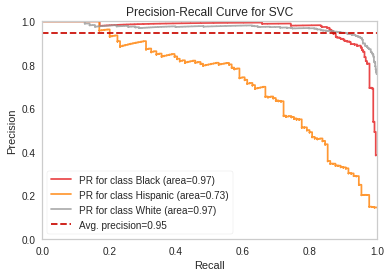

In [ ]:
operations_svc = [("scaler", StandardScaler()), ("svc", SVC(C=2, class_weight="balanced",random_state=101))]
model = Pipeline(steps=operations_svc)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [ ]:
y_pred = svm_model_grid.predict(X_test)

svc_AP = viz.score_["Hispanic"]
svc_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
svc_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 3. RF

### Vanilla RF Model

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
X2 = df.drop("DODRace",axis=1)
y = df.DODRace

In [ ]:
cat = X2.select_dtypes("object").columns
cat

Index(['Gender', 'Branch', 'SubjectsBirthLocation'], dtype='object')

In [ ]:
enc = OrdinalEncoder()
X2[cat] = enc.fit_transform(X2[cat])
X2.head()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,...,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Branch,SubjectsBirthLocation,Age
0,266,1467,337,222,1347,253,202,401,369,274,...,240,440,1054,815,175,853,1.0,0.0,91.0,41
1,233,1395,326,220,1293,245,193,394,338,257,...,225,371,1054,726,167,815,1.0,2.0,86.0,35
2,287,1430,341,230,1327,256,196,427,408,261,...,255,411,1041,929,180,831,1.0,2.0,86.0,42
3,234,1347,310,230,1239,262,199,401,359,262,...,205,399,968,794,176,793,1.0,1.0,133.0,31
4,250,1585,372,247,1478,267,224,435,356,263,...,214,379,1245,946,188,954,1.0,1.0,90.0,21


In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.2, random_state=101, stratify =y)

In [ ]:
print("Train features shape : ", X_train2.shape)
print("Train target shape   : ", y_train2.shape)
print("Test features shape  : ", X_test2.shape)
print("Test target shape    : ", y_test2.shape)

Train features shape :  (4610, 97)
Train target shape   :  (4610,)
Test features shape  :  (1153, 97)
Test target shape    :  (1153,)


In [ ]:
rf_model = RandomForestClassifier(class_weight="balanced", random_state=101)

In [ ]:
rf_model.fit(X_train2, y_train2)

RandomForestClassifier(class_weight='balanced', random_state=101)

In [ ]:
eval_metric(rf_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[185   0  74]
 [  9   7 120]
 [  9   0 749]]
              precision    recall  f1-score   support

       Black       0.91      0.71      0.80       259
    Hispanic       1.00      0.05      0.10       136
       White       0.79      0.99      0.88       758

    accuracy                           0.82      1153
   macro avg       0.90      0.58      0.59      1153
weighted avg       0.84      0.82      0.77      1153


Train_Set
[[1036    0    0]
 [   0  542    0]
 [   0    0 3032]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1036
    Hispanic       1.00      1.00      1.00       542
       White       1.00      1.00      1.00      3032

    accuracy                           1.00      4610
   macro avg       1.00      1.00      1.00      4610
weighted avg       1.00      1.00      1.00      4610



In [ ]:
model = RandomForestClassifier(class_weight="balanced", random_state=101)

scores = cross_validate(model, X_train2, y_train2, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic           0.066498
test_precision_Hispanic    0.673333
test_recall_Hispanic       0.035084
dtype: float64

### RF Model GridsearchCV

In [ ]:
param_grid = {'n_estimators':[30,100,200],
             'criterion': ["gini","entropy"],
             'max_depth':[5,13,16],
             'min_samples_split':[2,6,10],
             }

In [ ]:
rf_model = RandomForestClassifier()
rf_grid_model = GridSearchCV(rf_model,
                             param_grid,
                             verbose=2,
                             scoring="accuracy",
                             n_jobs=-1)

rf_grid_model.fit(X_train2,y_train2)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 13, 16],
                         'min_samples_split': [2, 6, 10],
                         'n_estimators': [30, 100, 200]},
             scoring='accuracy', verbose=2)

In [ ]:
model = RandomForestClassifier(class_weight="balanced", random_state=101)

scores = cross_validate(model, X_train2, y_train2, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic           0.066498
test_precision_Hispanic    0.673333
test_recall_Hispanic       0.035084
dtype: float64

In [ ]:
rf_grid_model.best_score_

0.8177874186550976

In [ ]:
rf_grid_model.best_params_

{'criterion': 'gini',
 'max_depth': 16,
 'min_samples_split': 10,
 'n_estimators': 100}

In [ ]:
eval_metric(rf_grid_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[200   0  59]
 [ 14   5 117]
 [  8   6 744]]
              precision    recall  f1-score   support

       Black       0.90      0.77      0.83       259
    Hispanic       0.45      0.04      0.07       136
       White       0.81      0.98      0.89       758

    accuracy                           0.82      1153
   macro avg       0.72      0.60      0.60      1153
weighted avg       0.79      0.82      0.78      1153


Train_Set
[[1005    0   31]
 [   9  364  169]
 [   0    0 3032]]
              precision    recall  f1-score   support

       Black       0.99      0.97      0.98      1036
    Hispanic       1.00      0.67      0.80       542
       White       0.94      1.00      0.97      3032

    accuracy                           0.95      4610
   macro avg       0.98      0.88      0.92      4610
weighted avg       0.96      0.95      0.95      4610



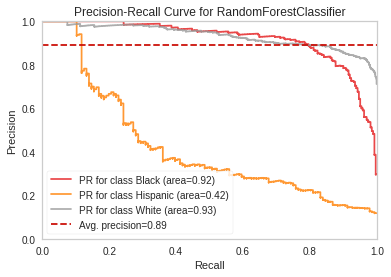

In [ ]:
model = RandomForestClassifier(class_weight="balanced", random_state=101, max_depth=10, n_estimators = 500)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train2, y_train2)
viz.score(X_test2, y_test2)
viz.show();

In [ ]:
y_pred = rf_grid_model.predict(X_test2)

rf_AP = viz.score_["Hispanic"]
rf_f1 = f1_score(y_test2, y_pred, average=None, labels=["Hispanic"])
rf_recall = recall_score(y_test2, y_pred, average=None, labels=["Hispanic"])

## 4. XGBoost

### Vanilla XGBoost Model

In [ ]:
xgb_model = XGBClassifier(random_state=101)

In [ ]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train2)
classes_weights

array([2.83517835, 0.50681618, 0.50681618, ..., 0.50681618, 0.50681618,
       0.50681618])

In [ ]:
comp = pd.DataFrame(classes_weights)

comp["label"] = y_train2.reset_index(drop=True)
comp.groupby("label")[0].value_counts()

label     0       
Black     1.483269    1036
Hispanic  2.835178     542
White     0.506816    3032
Name: 0, dtype: int64

In [ ]:
xgb_model.fit(X_train2,y_train2, sample_weight=classes_weights)
# weight parameter in XGBoost is per instance not per class. Therefore, we need to assign the weight of each class to its instances, which is the same thing.

XGBClassifier(objective='multi:softprob', random_state=101)

In [ ]:
eval_metric(xgb_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[227  12  20]
 [  7  89  40]
 [ 37 106 615]]
              precision    recall  f1-score   support

       Black       0.84      0.88      0.86       259
    Hispanic       0.43      0.65      0.52       136
       White       0.91      0.81      0.86       758

    accuracy                           0.81      1153
   macro avg       0.73      0.78      0.74      1153
weighted avg       0.84      0.81      0.82      1153


Train_Set
[[ 976   26   34]
 [  17  463   62]
 [  80  323 2629]]
              precision    recall  f1-score   support

       Black       0.91      0.94      0.93      1036
    Hispanic       0.57      0.85      0.68       542
       White       0.96      0.87      0.91      3032

    accuracy                           0.88      4610
   macro avg       0.81      0.89      0.84      4610
weighted avg       0.91      0.88      0.89      4610



In [ ]:
model = XGBClassifier(random_state=101)

scores = cross_validate(model, X_train2, y_train2, scoring = scoring, cv = 10, fit_params={"sample_weight":classes_weights})
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic           0.505663
test_precision_Hispanic    0.422384
test_recall_Hispanic       0.632828
dtype: float64

### XGBoost Model GridsearchCV

In [ ]:
param_grid = {"n_estimators":[50, 100],
              'max_depth':[1,2],
              "learning_rate": [0.1, 0.3],
              "subsample":[0.8, 1],
              "colsample_bytree":[0.8, 1]}

In [ ]:
xgb_model = XGBClassifier(random_state=101)
xgb_grid_model = GridSearchCV(xgb_model, 
                              param_grid, 
                              scoring=recall_Hispanic, 
                              n_jobs = -1, 
                              verbose = 2).fit(X_train2, y_train2,sample_weight=classes_weights)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


In [ ]:
xgb_grid_model.best_params_

{'colsample_bytree': 1,
 'learning_rate': 0.3,
 'max_depth': 1,
 'n_estimators': 100,
 'subsample': 0.8}

In [ ]:
xgb_grid_model.best_score_

0.6501529051987768

In [ ]:
eval_metric(xgb_grid_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[221  21  18]
 [ 15  86  35]
 [ 54 140 564]]
              precision    recall  f1-score   support

       Black       0.76      0.85      0.80       260
    Hispanic       0.35      0.63      0.45       136
       White       0.91      0.74      0.82       758

    accuracy                           0.75      1154
   macro avg       0.67      0.74      0.69      1154
weighted avg       0.81      0.75      0.77      1154


Train_Set
[[ 908   69   61]
 [  38  402  103]
 [ 136  524 2374]]
              precision    recall  f1-score   support

       Black       0.84      0.87      0.86      1038
    Hispanic       0.40      0.74      0.52       543
       White       0.94      0.78      0.85      3034

    accuracy                           0.80      4615
   macro avg       0.73      0.80      0.74      4615
weighted avg       0.85      0.80      0.81      4615



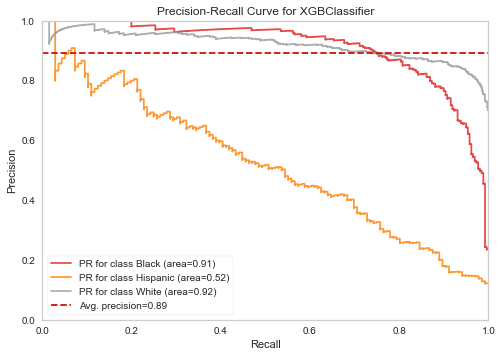

In [ ]:
model = XGBClassifier(learning_rate=0.3, max_depth=1,
              random_state=101, subsample=0.8)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1",
    sample_weight=classes_weights
)
viz.fit(X_train2, y_train2)
viz.score(X_test2, y_test2)
viz.show();

In [ ]:
y_pred = xgb_grid_model.predict(X_test2)

xgb_AP = viz.score_["Hispanic"]
xgb_f1 = f1_score(y_test2, y_pred, average=None, labels=["Hispanic"])
xgb_recall = recall_score(y_test2, y_pred, average=None, labels=["Hispanic"])

## Comparing Models


In [ ]:
compare = pd.DataFrame({"Model": ["Logistic Regression", "SVM",  "Random Forest", "XGBoost"],
                        "F1": [log_f1[0], svc_f1[0], rf_f1[0], xgb_f1[0]],
                        "Recall": [log_recall[0], svc_recall[0], rf_recall[0], xgb_recall[0]],
                        "AP": [log_AP, svc_AP, rf_AP, xgb_AP]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(313)
compare = compare.sort_values(by="AP", ascending=False)
ax=sns.barplot(x="AP", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()

---
---

---
---

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [ ]:
!pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

## SVC Over/Under Sampling

## Xgboost Over/ Under Sampling

- Evaluation metrics 
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

In [ ]:
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_test, y_pred)

0.7380728719663084

In [ ]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred)

0.7376215262514891

#  SHAP

https://towardsdatascience.com/shap-explain-any-machine-learning-model-in-python-24207127cad7

In [ ]:
# !pip install shap

  Attempting uninstall: packaging
    Found existing installation: packaging 20.9
    Uninstalling packaging-20.9:
      Successfully uninstalled packaging-20.9


In [ ]:
import shap
explainer = shap.Explainer(log_model,X_train)
start_index = 203
end_index = 204
shap_values = explainer.shap_values(X_test[start_index:end_index])

In [ ]:
shap_values

In [ ]:
print(shap_values[0].shape)

(1, 232)


In [ ]:
# %% >> Visualize local predictions
shap.initjs()
# Force plot
prediction = log_model.predict(X_test[start_index:end_index])[0]
print(f"The log_model predicted: {prediction}")
shap.force_plot(explainer.expected_value[1],
                shap_values[1],
                X_test[start_index:end_index], # for values
                feature_names= X.columns,) 

In [ ]:
shap.summary_plot(shap_values, X_train,max_display=300,feature_names = X.columns)

# Before the Deployment 
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___